In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/global-ai-job-market-and-salary-trends-2025/ai_job_dataset1.csv
/kaggle/input/global-ai-job-market-and-salary-trends-2025/ai_job_dataset.csv


# **Data Overview**

In [2]:
df = pd.read_csv("/kaggle/input/global-ai-job-market-and-salary-trends-2025/ai_job_dataset.csv")
df

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,AI14996,Robotics Engineer,38604,USD,EN,FL,Finland,S,Finland,50,"Java, Kubernetes, Azure",Bachelor,1,Energy,2025-02-06,2025-03-25,1635,7.9,Advanced Robotics
14996,AI14997,Machine Learning Researcher,57811,GBP,EN,CT,United Kingdom,M,United Kingdom,0,"Mathematics, Docker, SQL, Deep Learning",Master,0,Government,2024-10-16,2024-10-30,1624,8.2,Smart Analytics
14997,AI14998,NLP Engineer,189490,USD,EX,CT,South Korea,L,South Korea,50,"Scala, Spark, NLP",Associate,17,Manufacturing,2024-03-19,2024-05-02,1336,7.4,AI Innovations
14998,AI14999,Head of AI,79461,EUR,EN,FT,Netherlands,M,Netherlands,0,"Java, Computer Vision, Python, TensorFlow",PhD,1,Real Estate,2024-03-22,2024-04-23,1935,5.6,Smart Analytics


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [4]:
df.describe()

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,115348.965133,49.483333,6.253200,1503.314733,7.504273
std,60260.940438,40.812712,5.545768,576.127083,1.450870
min,32519.000000,0.000000,0.000000,500.000000,5.000000
25%,70179.750000,0.000000,2.000000,1003.750000,6.200000
50%,99705.000000,50.000000,5.000000,1512.000000,7.500000
75%,146408.500000,100.000000,10.000000,2000.000000,8.800000
max,399095.000000,100.000000,19.000000,2499.000000,10.000000


In [5]:
df.isna().sum()

job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64

In [6]:
def exlevels(col):
    mapping = {
        "EN": "Entry",
        "MI": "Mid",
        "SE": "Senior",
        "EX": "Executive"
    }
    return col.replace(mapping)

def employment(col):
    mapping = {
        "FT": "Full-time",
        "PT": "Part-time",
        "CT": "Contract",
        "FL": "Freelance"
    }
    return col.replace(mapping)

df["experience_level"] = exlevels(df["experience_level"])
df["employment_type"] = employment(df["employment_type"])

In [7]:
df["posting_date"] = pd.to_datetime( df["posting_date"], errors = "coerce")
df['application_deadline'] = pd.to_datetime(df['application_deadline'], errors='coerce')

In [8]:
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,Senior,Contract,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,Entry,Contract,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,Mid,Freelance,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,Senior,Freelance,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,Entry,Part-time,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [9]:
list(df.columns)

['job_id',
 'job_title',
 'salary_usd',
 'salary_currency',
 'experience_level',
 'employment_type',
 'company_location',
 'company_size',
 'employee_residence',
 'remote_ratio',
 'required_skills',
 'education_required',
 'years_experience',
 'industry',
 'posting_date',
 'application_deadline',
 'job_description_length',
 'benefits_score',
 'company_name']

# **Average salary for each job**
* **This barchart shows top roles in the Ai fields. Data Engineers have the highest average salary.**

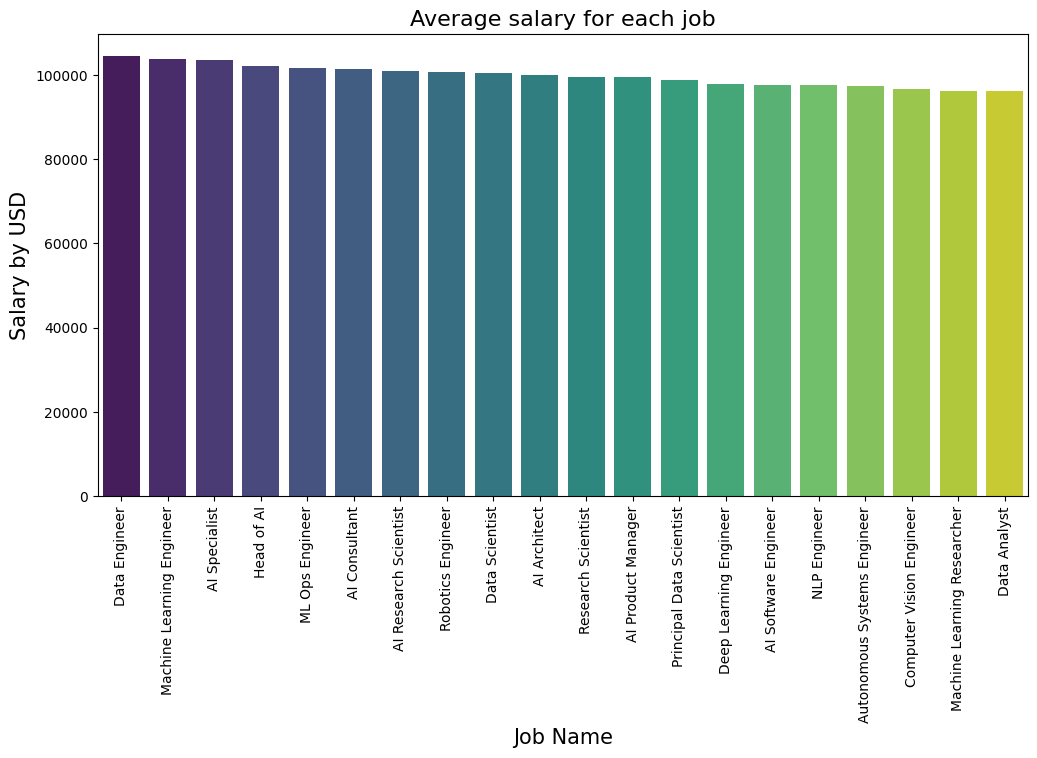

In [10]:
top_salary = df.groupby("job_title")["salary_usd"].median().reset_index().sort_values(by="salary_usd",ascending = False)

plt.figure(figsize=(12,6))
sns.barplot(data=top_salary, x="job_title", y="salary_usd",palette="viridis")
plt.title("Average salary for each job",fontsize=16)
plt.xlabel('Job Name', fontsize=15)
plt.ylabel('Salary by USD', fontsize=15)
plt.xticks(rotation=90)
plt.show()

# Top eduction required for each job
* **parchart ده بيشرح ايه اكتر حاجة مطلوبه كتعليم علشان تقدم على الوظائف دي**

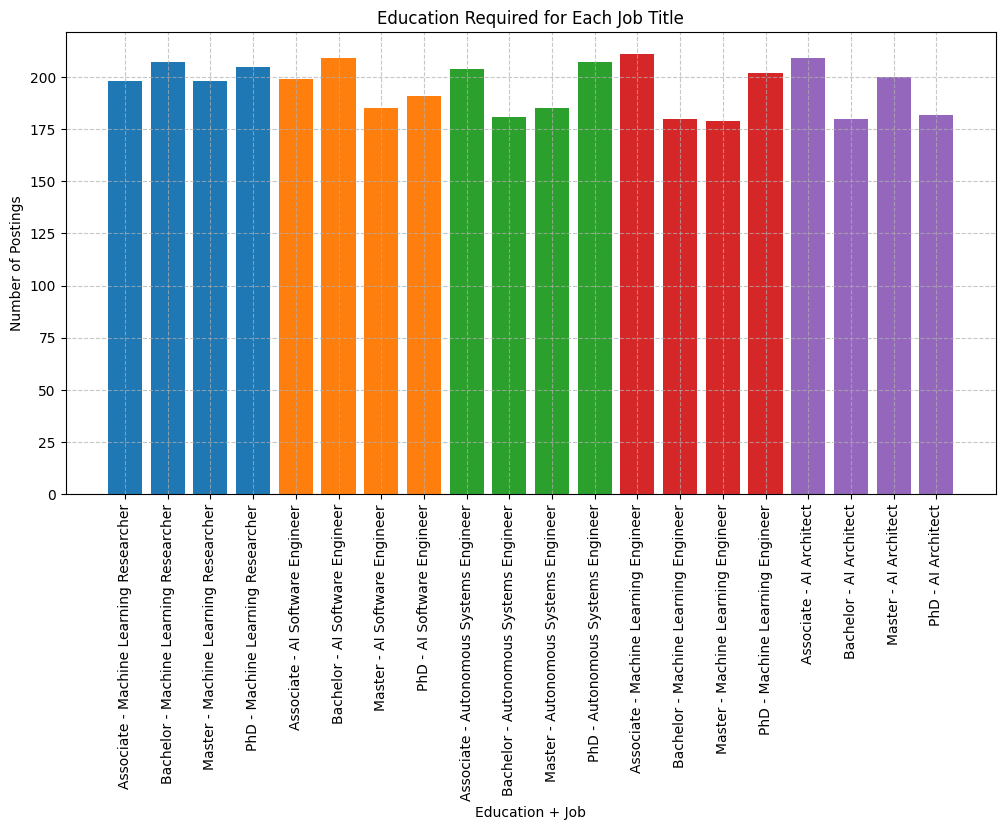

In [11]:
edu_counts = (
    df.groupby(['job_title', 'education_required'])
      .size()
      .reset_index(name='count')
)
top_jobs = df['job_title'].value_counts().head().index
edu_counts = edu_counts[edu_counts['job_title'].isin(top_jobs)]
plt.figure(figsize=(12,6))

for job in top_jobs:
    subset = edu_counts[edu_counts['job_title'] == job]
    plt.bar(
        subset['education_required'] + " - " + job,
        subset['count']
    )

plt.xticks(rotation=90)
plt.title('Education Required for Each Job Title')
plt.ylabel('Number of Postings')
plt.xlabel('Education + Job')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# **Average Salary by Years of Experience**

* **The relationship here shows that the more years of experience, but after 9 year's the bar remains slightly the same, and I took the median because there were many outliers.**
* **I'll also add the chart with max salaries so we can see the difference.**



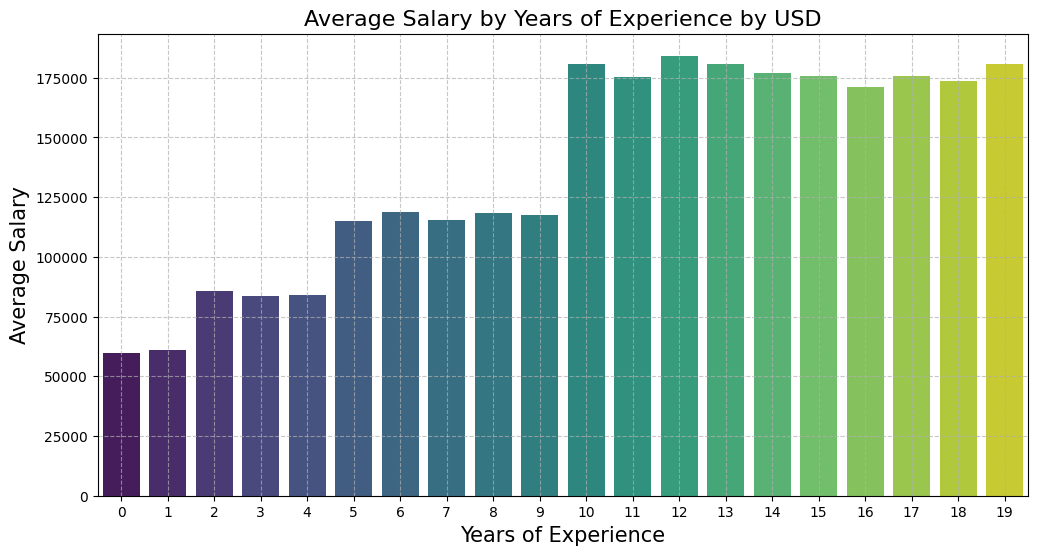

In [12]:
highest_paid_by_exp = df.groupby('years_experience')['salary_usd'].median()
plt.figure(figsize=(12, 6))
sns.barplot(
    x=highest_paid_by_exp.index,
    y=highest_paid_by_exp.values,
    palette="viridis"
)

plt.title('Average Salary by Years of Experience by USD', fontsize=16)
plt.xlabel('Years of Experience', fontsize=15)
plt.ylabel('Average Salary', fontsize=15)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

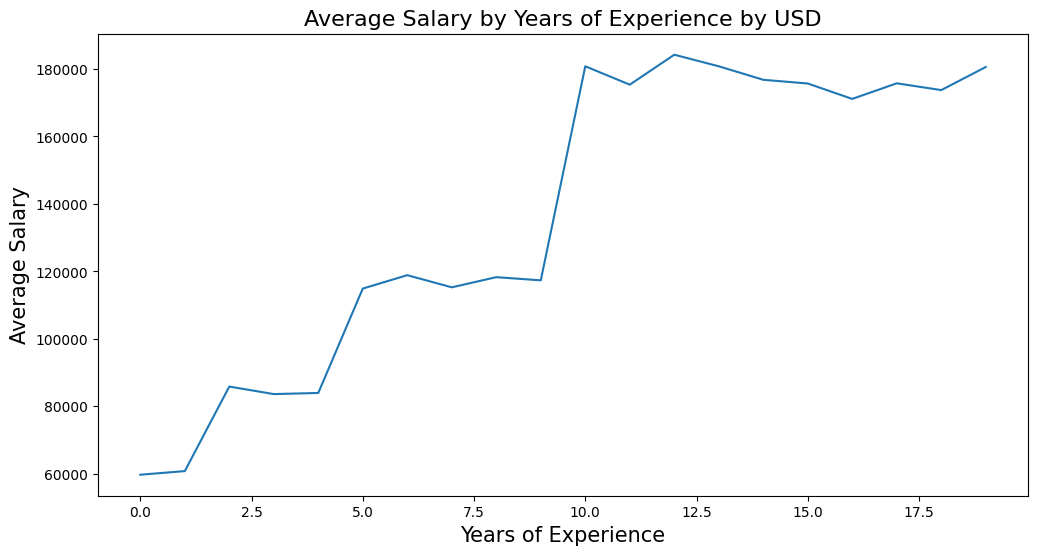

In [13]:
highest_paid_by_exp = df.groupby('years_experience')['salary_usd'].median().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=highest_paid_by_exp,
    x='years_experience',
    y='salary_usd'
)

plt.title('Average Salary by Years of Experience by USD', fontsize=16)
plt.xlabel('Years of Experience', fontsize=15)
plt.ylabel('Average Salary', fontsize=15)
plt.show()

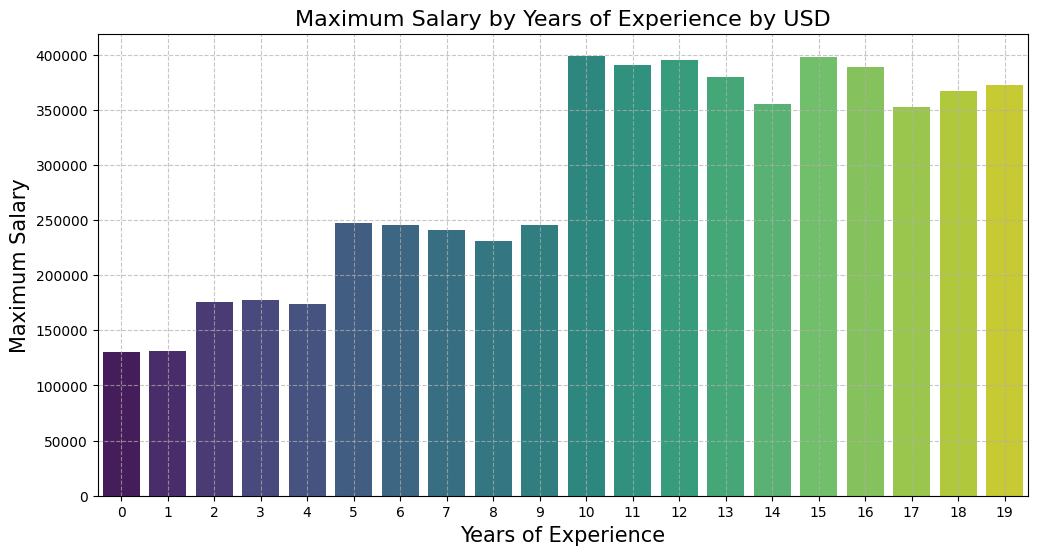

In [14]:
highest_paid_by_exp = df.groupby('years_experience')['salary_usd'].max()
plt.figure(figsize=(12, 6))
sns.barplot(
    x=highest_paid_by_exp.index,
    y=highest_paid_by_exp.values,
    palette="viridis"
)

plt.title('Maximum Salary by Years of Experience by USD', fontsize=16)
plt.xlabel('Years of Experience', fontsize=15)
plt.ylabel('Maximum Salary', fontsize=15)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# **Salary Distribution by Employment Type**
* **This boxplot shows compress salary across employment types and we can see alot of outliers in all categories**

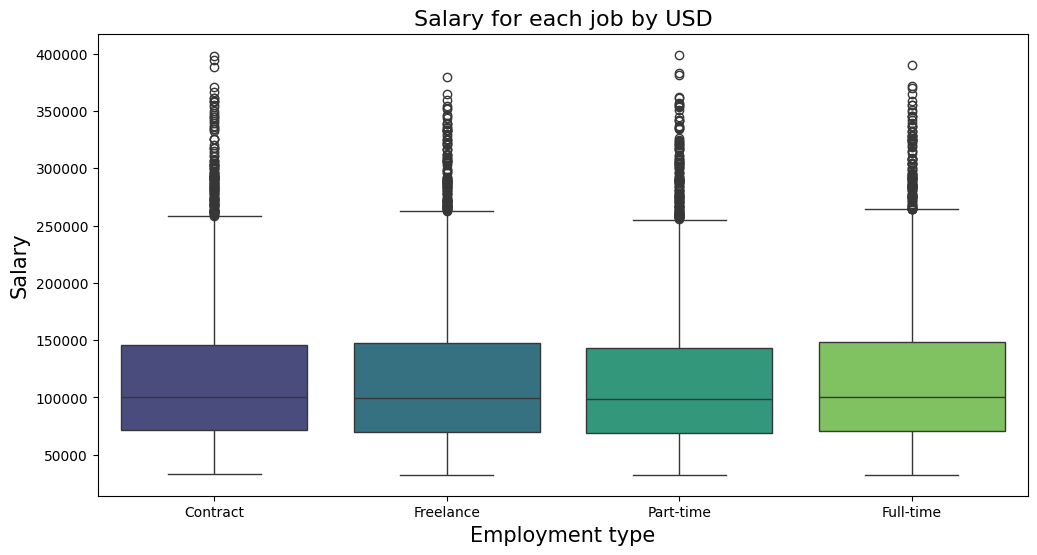

In [15]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="employment_type", y="salary_usd",palette="viridis")
plt.title("Salary for each job by USD",fontsize=16)
plt.xlabel('Employment type', fontsize=15)
plt.ylabel('Salary', fontsize=15)
plt.show()

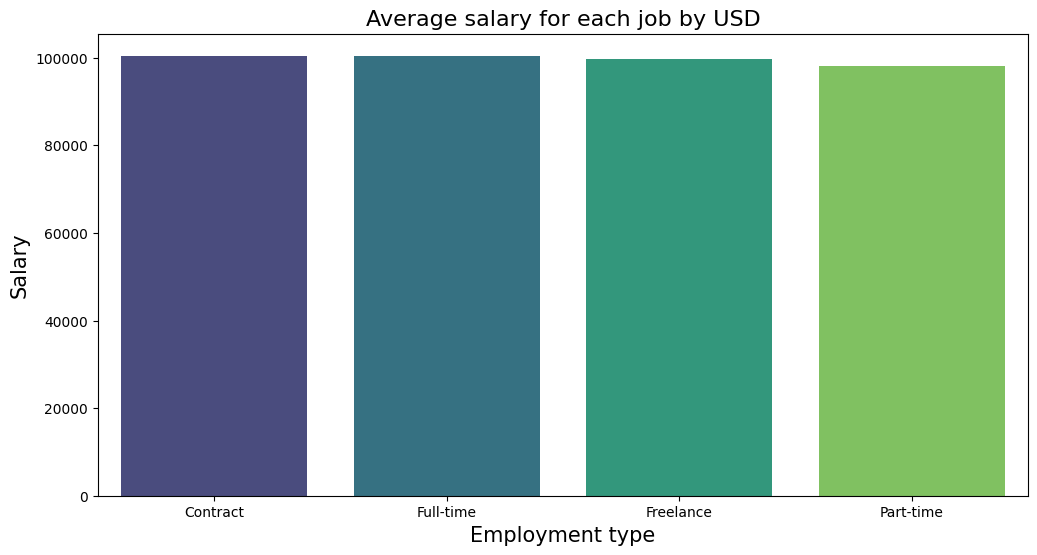

In [16]:
top_salary = df.groupby("employment_type")["salary_usd"].median().reset_index().sort_values(by = "salary_usd",ascending = False)

plt.figure(figsize=(12,6))
sns.barplot(data=top_salary, x="employment_type", y="salary_usd",palette="viridis")
plt.title("Average salary for each job by USD",fontsize=16)
plt.xlabel('Employment type', fontsize=15)
plt.ylabel('Salary', fontsize=15)
plt.show()

# **Company posting jobs**
* **This Barchart show the top company hiring for work ,ranked from Higher to lower**

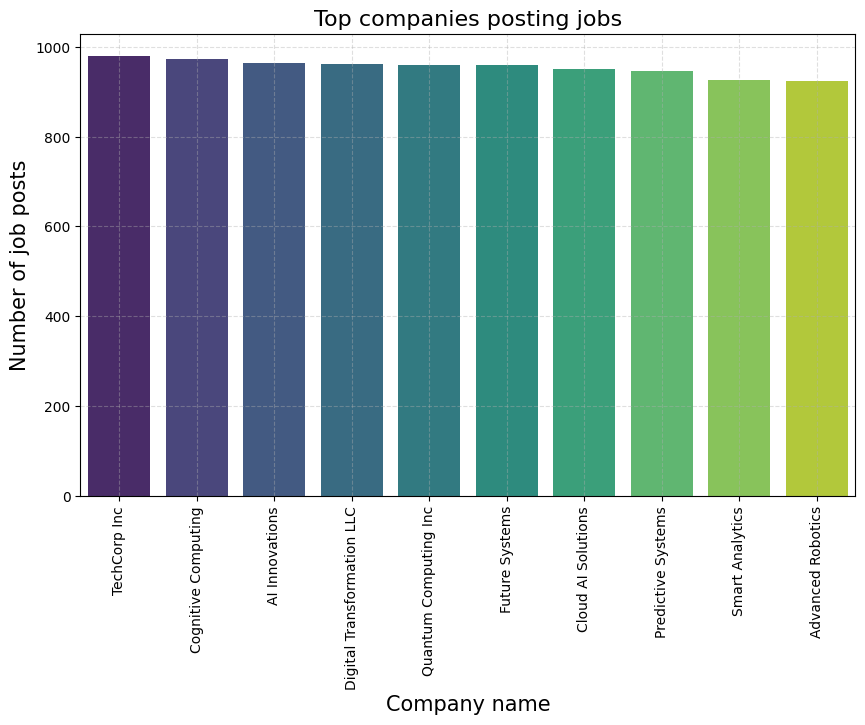

In [17]:
top_companies = (df["company_name"].value_counts().head(10).reset_index())
top_companies.columns = ["company_name", "job_count"]

plt.figure(figsize=(10,6))
sns.barplot(data=top_companies, x="company_name", y="job_count",palette="viridis")
plt.xlabel('Company name', fontsize=15)
plt.ylabel('Number of job posts', fontsize=15)
plt.grid(True, linestyle='--', alpha=0.4)
plt.title("Top companies posting jobs",fontsize=16)
plt.xticks(rotation=90)
plt.show()

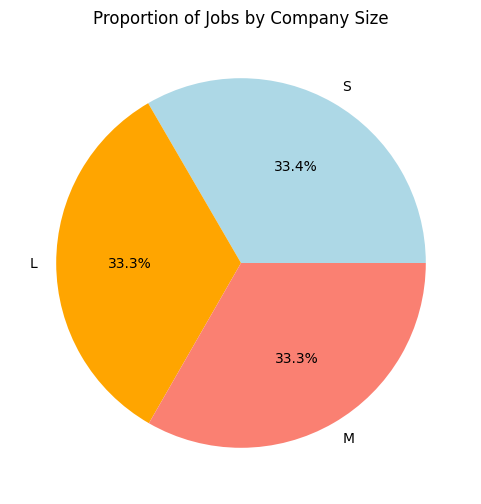

In [18]:
plt.figure(figsize=(6, 6))
company_size_counts = df['company_size'].value_counts()
plt.pie(
    company_size_counts,
    labels=company_size_counts.index,
    autopct='%1.1f%%',
    colors=["lightblue", "orange", "salmon"]
)

plt.title('Proportion of Jobs by Company Size')
plt.show()

# **Distribution of Salary**
* **The salary distribution is right skewed most salaries around 50000 - 150000**

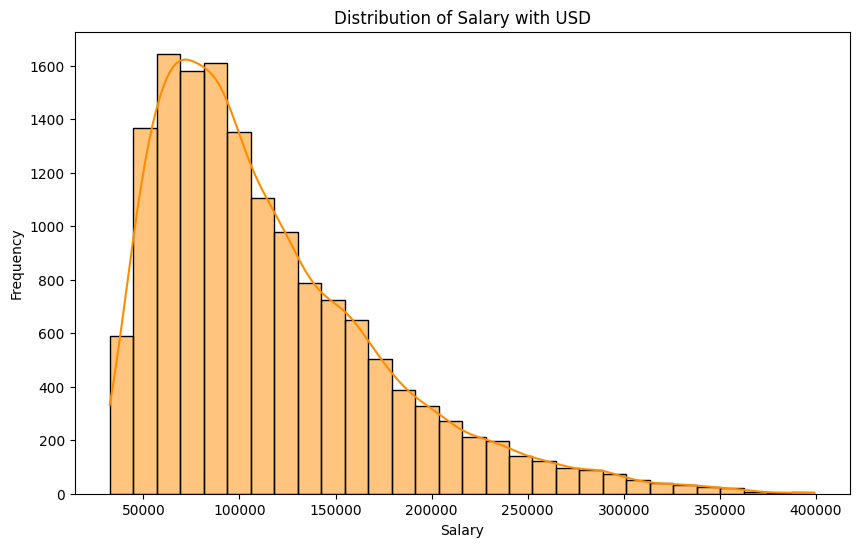

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(
    df['salary_usd'],
    kde=True,
    bins=30,
    color='darkorange'
)
plt.title('Distribution of Salary with USD')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

# **Top contries hiring Ai Roles**
* **Germany here has top 1 for hiring Ai Roles**

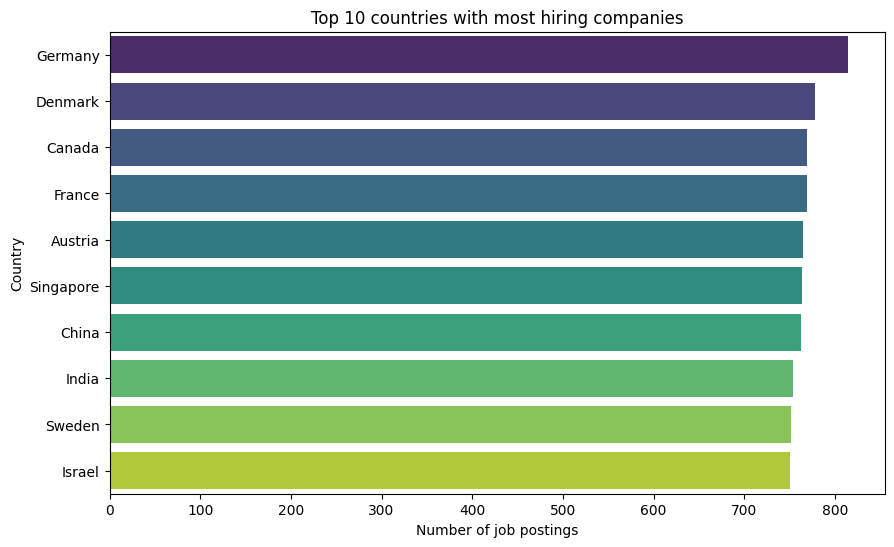

In [20]:
top_countries = (
    df["company_location"]
    .value_counts()
    .head(10)
    .reset_index()
)
top_countries.columns = ["country", "job_count"]
plt.figure(figsize=(10,6))
sns.barplot(data=top_countries, y="country", x="job_count", palette="viridis")

plt.title("Top 10 countries with most hiring companies")
plt.xlabel("Number of job postings")
plt.ylabel("Country")

plt.show()